# CNN

In [2]:
from collections import Counter
import os
import warnings

import cv2 as cv
import matplotlib.pyplot as plt
# Importing all necessary libraries
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


warnings.filterwarnings('ignore')

# What does our image data look like?

Total number of categories: 150
Total number of images in dataset: 6837


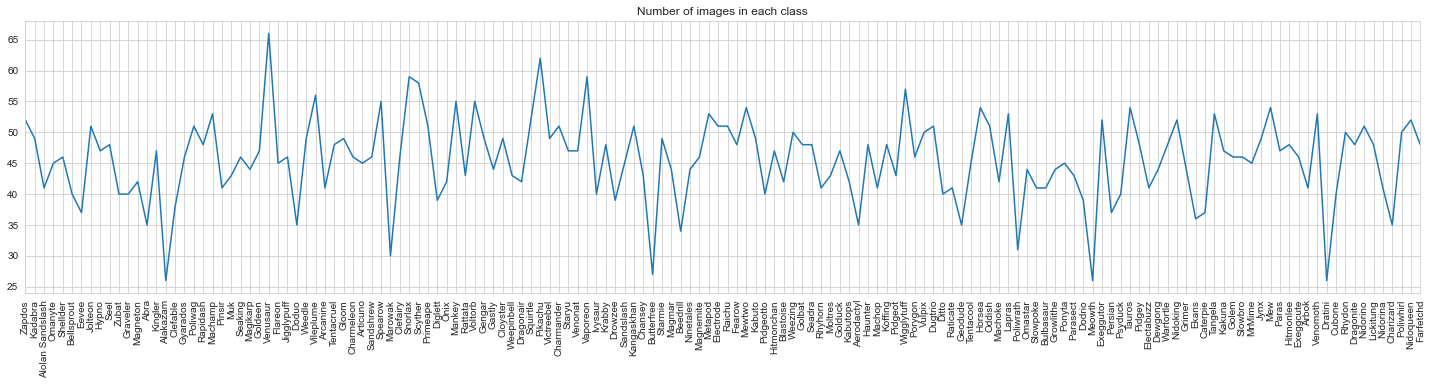

In [4]:
# A little bit of data exploration
path = 'input/PokemonData' # Path to directory which contains classes
classes = os.listdir(path) # List of all classes
print(f'Total number of categories: {len(classes)}')

# A dictionary which contains class and number of images in that class
counts = {}
for c in classes:
    counts[c] = len(os.listdir(os.path.join(path, c)))
    
print(f'Total number of images in dataset: {sum(list(counts.values()))}')

# Number of images in each clsss plot
fig = plt.figure(figsize = (25, 5))
sns.lineplot(x = list(counts.keys()), y = list(counts.values())).set_title('Number of images in each class')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

Let's break our pokemon data into two halves.  Sending to many images to our classifier will make it take a long time.

## First Half of pokemon images we have.

In [5]:
# Sort our "counts" dictionary and selecting 5 classes with most number of images
combined = sorted(counts.items(), key = lambda x: x[1], reverse = True)
print(combined)

# Taking only labels, it will come in handy in future
combined = [i[0] for i in combined]
print(combined)

[('Venusaur', 66), ('Pikachu', 62), ('Snorlax', 59), ('Vaporeon', 59), ('Scyther', 58), ('Wigglytuff', 57), ('Vileplume', 56), ('Spearow', 55), ('Mankey', 55), ('Voltorb', 55), ('Mewtwo', 54), ('Horsea', 54), ('Tauros', 54), ('Mew', 54), ('Machamp', 53), ('Metapod', 53), ('Lapras', 53), ('Tangela', 53), ('Venomoth', 53), ('Zapdos', 52), ('Squirtle', 52), ('Exeggutor', 52), ('Nidoking', 52), ('Nidoqueen', 52), ('Jolteon', 51), ('Poliwag', 51), ('Primeape', 51), ('Charmander', 51), ('Kangaskhan', 51), ('Electrode', 51), ('Raichu', 51), ('Dugtrio', 51), ('Oddish', 51), ('Nidorino', 51), ('Weezing', 50), ('Vulpix', 50), ('Rhydon', 50), ('Poliwhirl', 50), ('Kadabra', 49), ('Weedle', 49), ('Gloom', 49), ('Gengar', 49), ('Cloyster', 49), ('Victreebel', 49), ('Starmie', 49), ('Kabuto', 49), ('Jynx', 49), ('Seel', 48), ('Rapidash', 48), ('Tentacruel', 48), ('Krabby', 48), ('Fearow', 48), ('Golbat', 48), ('Seadra', 48), ('Haunter', 48), ('Koffing', 48), ('Pidgey', 48), ('Wartortle', 48), ('Hitmo

Venusaur, Pikachu, Snorlax, Vaporeon and Scyther are the Pokemon that we have the most images for.  

Next we'll attempt to remove images that won't process well.

In [6]:
X = [] # List for images
Y = [] # List for labels

# Loop through all classes
for c in classes:
    # We take only classes that we defined in 'first_half' list
    if c in combined:
        dir_path = os.path.join(path, c)
        label = combined.index(c) # Our label is an index of class in 'first_half' list
        
        # Reading, resizing and adding image and label to lists
        for i in os.listdir(dir_path):
            image = cv.imread(os.path.join(dir_path, i))
            
            try:
                resized = cv.resize(image, (96, 96)) 
                X.append(resized)
                Y.append(label)
            
            # If we can't read image - we skip it
            except:
                print(os.path.join(dir_path, i), '[ERROR] can\'t read the file')
                continue       
            
print('DONE')

input/PokemonData/Zapdos/c99b2d19544c4cbbacd7711ade660279.svg [ERROR] can't read the file


libpng warning: iCCP: known incorrect sRGB profile


input/PokemonData/Graveler/3fe3c6a0bbd14de89092d2c675f743c1.svg [ERROR] can't read the file
input/PokemonData/Magneton/45e434d002bd44eeb1acbc2decc8ee0f.svg [ERROR] can't read the file
input/PokemonData/Tentacruel/d6fb0a3046364ea2b49525c6f6b966e5.svg [ERROR] can't read the file
input/PokemonData/Scyther/a8734f10941a4deb95fcf7388e4fe8e2.svg [ERROR] can't read the file
input/PokemonData/Cloyster/ff270ebfab0f46b3b05c3fecd6a15ef9.svg [ERROR] can't read the file


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


input/PokemonData/Golduck/bc08a691e7cb41b0bec2adf931dc9634.svg [ERROR] can't read the file
input/PokemonData/Omastar/1be6e7da1bba4379b298b20013c57b4b.svg [ERROR] can't read the file
input/PokemonData/Exeggutor/2b8bc491c5ca4e788999f8ea53617638.svg [ERROR] can't read the file
input/PokemonData/Exeggutor/f29b4f9fccff4055b167ece6556143cd.svg [ERROR] can't read the file
input/PokemonData/Dewgong/e3ecbb47e192470aa8686734b7813b43.svg [ERROR] can't read the file
input/PokemonData/Venomoth/bb5d47bced6e4e33a77faa17e1eec906.svg [ERROR] can't read the file
DONE


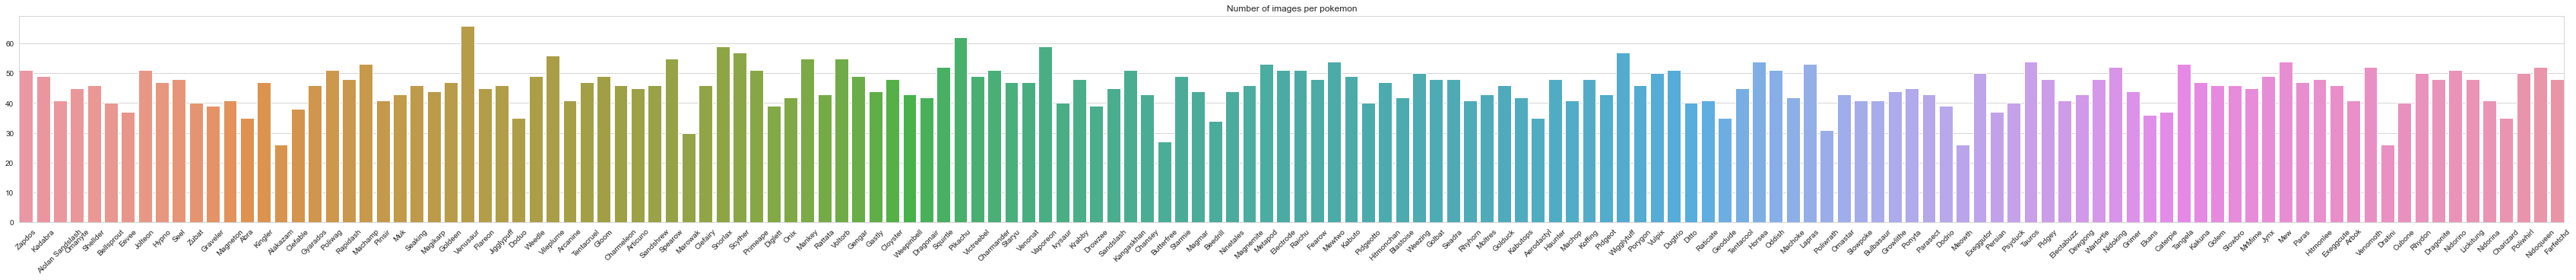

In [7]:
# Counting appearances of each label in labels list
obj = Counter(Y)

# Plotting number of images in each class
fig = plt.figure(figsize = (60, 5))
sns.barplot(x = [combined[i] for i in obj.keys()], y = list(obj.values())).set_title('Number of images per pokemon')
plt.margins(x=0)
plt.xticks(rotation=45)
plt.show()

In [8]:
from tensorflow.keras.utils import to_categorical

# Convert list with images to numpy array and reshape it 
X = np.array(X).reshape(-1, 96, 96, 3)

# Scaling data in array
X = X / 255.0

# Convert labels to categorical format
y = to_categorical(Y, num_classes = len(combined))

# Splitting data to train and test datasets
# I'll use these datasets only for training, for final predictions I'll use random pictures from internet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 666)

Use data augmentation to provide even more images.

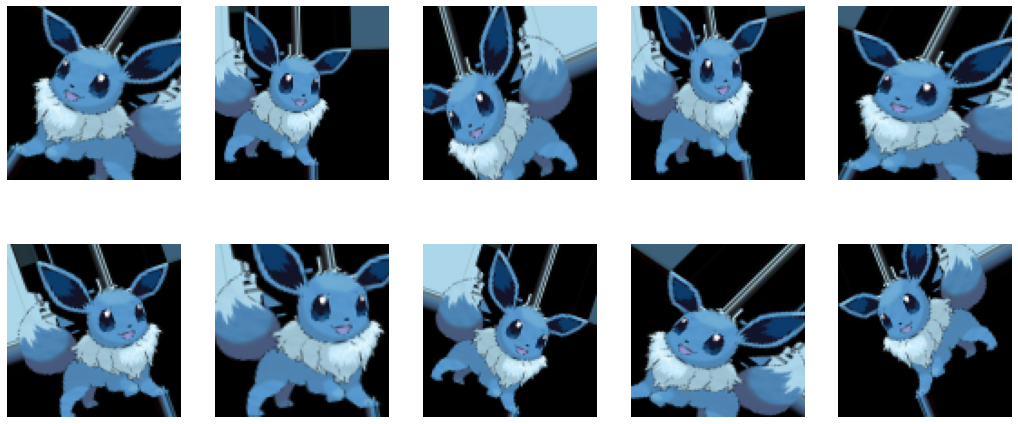

In [9]:
# Defining ImageDataGenerator Instance
datagen = ImageDataGenerator(rotation_range = 45, # Degree range for random rotations
                            zoom_range = 0.2, # Range for random zoom 
                            horizontal_flip = True, # Randomly flip inputs horizontally
                            width_shift_range = 0.15, # Range for horizontal shift 
                            height_shift_range = 0.15, # Range for vertical shift 
                            shear_range = 0.2) # Shear Intensity

datagen.fit(X_train)

# This piece of code can be used if you eant to look what your datagen doing with your images
img = X[300]
img = img.reshape([-1, 96, 96, 3])

i = 0
fig_check = plt.figure(figsize = (18, 8))

for i, flow in enumerate(datagen.flow(img, batch_size = 1)):
    fig_check.add_subplot(2, 5, i+1)
    plt.imshow(np.squeeze(flow[:, :, ::-1]))
    plt.axis('off')
    i += 1
    if i >= 10:
        break

# Build the model

In [8]:
len(combined)

150

In [11]:
model = keras.Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape =(96, 96, 3), kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(combined), activation = 'softmax'))

model.summary()

2022-06-01 18:20:03.431625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       2

In [ ]:
checkpoint = ModelCheckpoint('working/best_model_combined.hdf5', verbose = 1, monitor = 'val_accuracy', save_best_only = True)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 60, validation_data = [X_test, y_test],
                             steps_per_epoch=len(X_train) // 32, callbacks = [checkpoint])

Epoch 1/60
 80/170 [=============>................] - ETA: 1:20 - loss: 5.7638 - accuracy: 0.0117

In [1]:
# Plot learning curves
fig = plt.figure(figsize = (17, 4))

plt.subplot(121)
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

NameError: name 'plt' is not defined

In [10]:
# Loading weights from best model
model.load_weights('working/best_model_combined.hdf5')

# Saving all model
model.save('working/combined_model.hdf5')

NameError: name 'model' is not defined

In [ ]:
mewtwo = ['https://cdn.bulbagarden.net/upload/thumb/7/78/150Mewtwo.png/250px-150Mewtwo.png',
         'https://cdn.vox-cdn.com/thumbor/sZPPvUyKyF97UEU-nNtVnC3LpF8=/0x0:1750x941/1200x800/filters:focal(878x316:1158x596)/cdn.vox-cdn.com/uploads/chorus_image/image/63823444/original.0.jpg',
         'https://images-na.ssl-images-amazon.com/images/I/61j5ozFjJ0L._SL1024_.jpg']

pikachu = ['https://lh3.googleusercontent.com/proxy/DrjDlKlu9YonKbj3iNCJNJ3DGqzy9GjeXXSUv-TcVV4UN9PMCAM5yIkGLPG7wYo3UeA4sq5OmUWM8M6K5hy2KOAhf8SOL3zPH3axb2Xo3HX2XTU8M2xW4X6lVg=w720-h405-rw',
          'https://johnlewis.scene7.com/is/image/JohnLewis/237525467']

charmander = ['https://img.pokemondb.net/artwork/large/charmander.jpg',
             'https://www.pokemoncenter.com/wcsstore/PokemonCatalogAssetStore/images/catalog/products/P5073/701-03990/P5073_701-03990_01.jpg',
             'https://static.posters.cz/image/750/%D0%A7%D0%B0%D1%88%D0%BA%D0%B0/pokemon-charmander-glow-i72513.jpg']

bulbasaur = ['https://img.pokemondb.net/artwork/large/bulbasaur.jpg',
            'https://ae01.alicdn.com/kf/HTB1aWullxSYBuNjSsphq6zGvVXaR/Big-Size-55-CM-Plush-Toy-Squirtle-Bulbasaur-Charmander-Toy-Sleeping-Pillow-Doll-For-Kid-Birthday.jpg',
            'https://cdn.bulbagarden.net/upload/thumb/f/f7/Bulbasaur_Detective_Pikachu.jpg/250px-Bulbasaur_Detective_Pikachu.jpg']

squirtle = ['https://assets.pokemon.com/assets/cms2/img/pokedex/full/007.png',
           'https://cdn.vox-cdn.com/thumbor/l4cKX7ZWargjs-zlxOSW2WZVgfI=/0x0:2040x1360/1200x800/filters:focal(857x517:1183x843)/cdn.vox-cdn.com/uploads/chorus_image/image/61498573/jbareham_180925_ply0802_0030.1537570476.jpg',
           'https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fdavidthier%2Ffiles%2F2018%2F07%2FSquirtle_Squad.jpg']

test_df = [mewtwo, pikachu, charmander, bulbasaur, squirtle]
test_df

In [ ]:
import requests

# Lists to store our future data
val_x = []
val_y = []

for i, urls in enumerate(test_df):
    for url in urls:
        r = requests.get(url, stream = True).raw
        image = np.asarray(bytearray(r.read()), dtype="uint8")
        image = cv.imdecode(image, cv.IMREAD_COLOR)

        if (image is not None):
            val_x.append(image)
            val_y.append(i)

            plt.imshow(image)
            plt.show()

# Predictions

In [ ]:
rows = 5
cols = 3

fig = plt.figure(figsize = (25, 25))

for i, j in enumerate(zip(val_x, val_y)): # i - for subplots
    orig = j[0] # Original, not resized image
    label = j[1] # Label for that image

    image = cv.resize(orig, (96, 96)) # Resizing image to (96, 96)
    image = image.reshape(-1, 96, 96, 3) / 255.0 # Reshape and scale resized image
    preds = model.predict(image) # Predicting image
    pred_class = np.argmax(preds) # Defining predicted class

    true_label = f'True class: {combined[label]}'
    pred_label = f'Predicted: {combined[pred_class]} {round(preds[0][pred_class] * 100, 2)}%'

    fig.add_subplot(rows, cols, i+1)
    plt.imshow(orig[:, :, ::-1])
    plt.title(f'{true_label}\n{pred_label}')
    plt.axis('off')

plt.tight_layout()